In [4]:
import spacy
from spacy import displacy

In [6]:
nlp = spacy.load('en_core_web_sm')

In [7]:
text = "Apple, This is first sentence. and Google this is another one. here 3rd one is"
doc = nlp(text)

In [13]:
doc

Apple, This is first sentence. and Google this is another one. here 3rd one is

In [19]:
for token in doc:
    print(token.text)
#     print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,token.shape_, token.is_alpha, token.is_stop)

Apple
,
This
is
first
sentence
.
and
Google
this
is
another
one
.
here
3rd
one
is


In [21]:
for sent in doc.sents:
    print(sent)

Apple, This is first sentence.
and Google this is another one.
here 3rd one is


In [27]:
displacy.render(doc, style="ent")

In [22]:
from spacy.lang.en.stop_words import STOP_WORDS

stopwords = list(STOP_WORDS)
print(stopwords)

['if', 'itself', 'your', 'and', 'seeming', 'few', 'can', "'s", 'too', 'has', 'another', 'much', 'somehow', 'throughout', 'quite', 'yet', 'due', 'other', 'am', 'across', 'empty', 'which', 'whither', 'down', 'namely', 'besides', 'cannot', 'least', 'at', '’s', 'n‘t', 'show', 'nobody', 'because', 'move', 'him', 'something', 'everything', 'these', 'used', 're', 'neither', 'over', 'thereafter', 'being', 'amount', 'we', 'ca', '’ll', 'name', 'nothing', 'forty', 'for', 'someone', 'several', 'well', 'how', 'regarding', "'d", '’re', 'have', 'very', "'ve", 'latterly', 'upon', 'twenty', 'along', 'yours', 'each', 'now', 'sometimes', 'hundred', '‘m', 'between', 'mostly', 'are', 'on', 'our', 'never', 'every', 'latter', 'herein', 'almost', 'might', 'ten', 'should', 'eleven', 'as', 'meanwhile', 'thru', 'off', 'whereupon', 'often', 'only', 'ever', 'unless', 'those', 'us', '‘d', 'whether', 'toward', 'my', 'afterwards', 'whom', 'per', 'some', 'why', 'last', 'to', 'did', 'third', 'until', 'their', 'next', '

In [31]:
for token in doc:
    if token.is_stop == False:
        print(token)
# [print(token.text) for token in doc if token.text not in stopwords]

Apple
,
sentence
.
Google
.
3rd


### Lemmatization

In [35]:
doc = nlp('run runs running ran')

In [37]:
for lem in doc:
    print(lem.text,'\t', lem.lemma_)

run 	 run
runs 	 run
running 	 run
ran 	 run


### NER

In [45]:
doc = nlp("New York City on Tuesday declared a public health emergency and ordered mandatory measles vaccinations amid an outbreak, becoming the latest national flash point over refusals to inoculate against dangerous diseases. At least 285 people have contracted measles in the city since September, mostly in Brooklyn’s Williamsburg neighborhood. The order covers four Zip codes there, Mayor Bill de Blasio (D) said Tuesday. The mandate orders all unvaccinated people in the area, including a concentration of Orthodox Jews, to receive inoculations, including for children as young as 6 months old. Anyone who resists could be fined up to $1,000.")

In [46]:
displacy.render(doc, style = 'ent')

<hr>

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

In [40]:
data_yelp = pd.read_csv('./resources/yelp_labelled.txt', sep='\t', header = None)

In [41]:
data_yelp.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [43]:
columns_name = ['Review', 'Sentiment']
data_yelp.columns = columns_name
data_yelp.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [47]:
data_yelp.shape

(1000, 2)

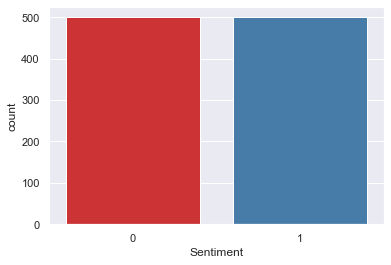

In [49]:
sns.countplot(x = data_yelp.Sentiment,palette="Set1")

In [50]:
data_yelp.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [51]:
import string
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
def text_data_cleaning(sentence):
    doc = nlp(sentence)
    
    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)
    
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [53]:
text_data_cleaning("    Hello how are you. Like this video")

['hello', 'like', 'video']

In [69]:
from sklearn.svm import LinearSVC

In [70]:
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)
classifier = LinearSVC()
data = data_yelp

In [71]:
X = data['Review']
y = data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape

((800,), (200,))

In [72]:
clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])

In [73]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text_data_cleaning at 0x000002033D305798>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_inter

In [74]:
y_pred = clf.predict(X_test)

In [75]:
confusion_matrix(y_test, y_pred)

array([[79, 17],
       [29, 75]], dtype=int64)

In [76]:
accuracy_score(y_test, y_pred)

0.77

In [79]:
clf.predict(['Wow, this is an amazing lesson'])

array([1], dtype=int64)

In [81]:
clf.predict(['Too bad, this sucks'])

array([0], dtype=int64)